<a href="https://www.kaggle.com/code/fariskarim/salary-w-feature-engineering-mlr-and-rf?scriptVersionId=138956255" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salaly-prediction-for-beginer/Salary Data.csv


In [2]:
salary_data = pd.read_csv('/kaggle/input/salaly-prediction-for-beginer/Salary Data.csv')

**Read the head of the data and get info on it**

In [3]:
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


## Drop null values since there are only 2

In [5]:
salary_data_cleaned = salary_data.dropna()

salary_data_cleaned.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [6]:
salary_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


# Visualize the data

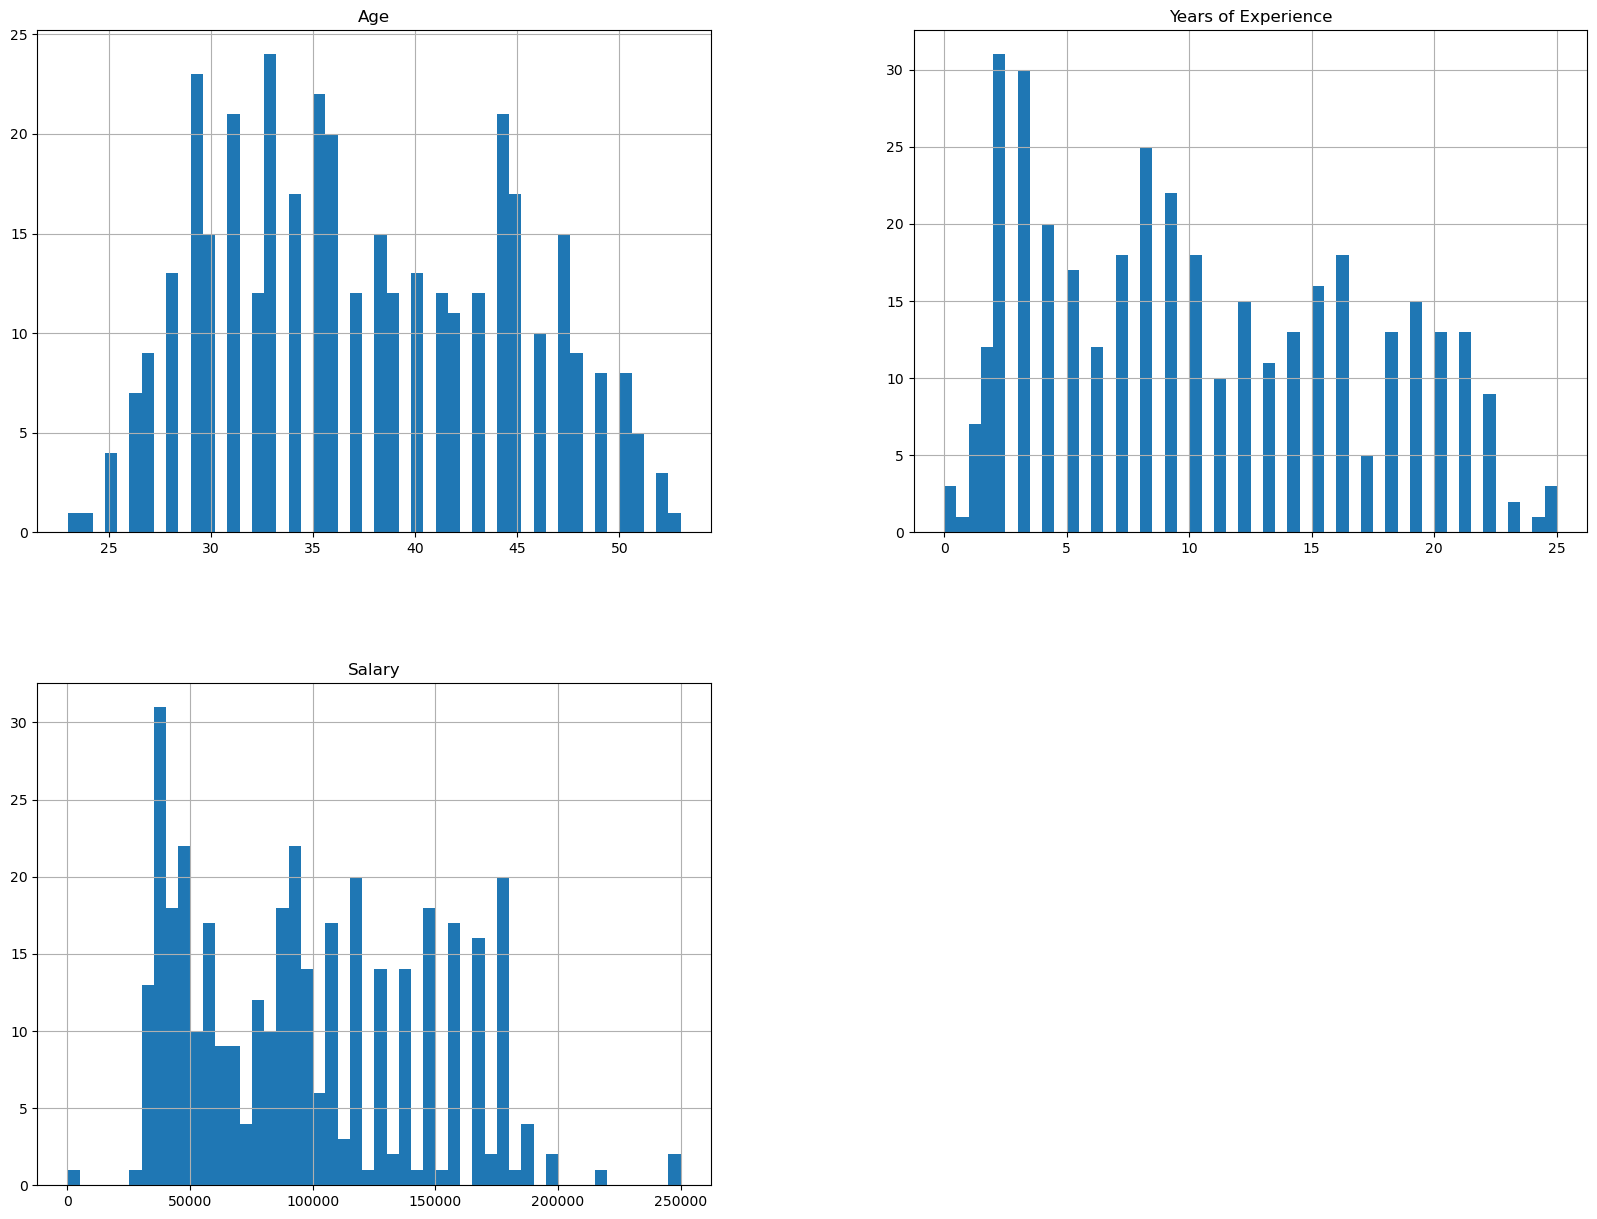

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
salary_data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
corr_matrix = salary_data.corr()

/tmp/ipykernel_32/2345637380.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = salary_data.corr()


# Check how the different independent variables are correlated with the target variable

In [9]:
corr_matrix['Salary'].sort_values(ascending=False)

Salary                 1.000000
Years of Experience    0.930338
Age                    0.922335
Name: Salary, dtype: float64

In [10]:
salary_data_cleaned['Education Level'].value_counts()

Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64

Use **label encoding** to change the categorical variable **'Education Level'** into numeric values, where each unique category is assigned an integer label

I used label encoding instead of one-hot encoding because there is hierarchy among the categories ('Bachelors', 'Masters', 'PhD')

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

salary_data_cleaned['EncodedEducation'] = label_encoder.fit_transform(salary_data_cleaned['Education Level'])


salary_data_cleaned.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_32/853381263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data_cleaned['EncodedEducation'] = label_encoder.fit_transform(salary_data_cleaned['Education Level'])


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,EncodedEducation
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0
4,52.0,Male,Master's,Director,20.0,200000.0,1


In [12]:
salary_data_cleaned['Job Title'].value_counts()

Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: Job Title, Length: 174, dtype: int64

Transform the **'Job Title**' column and make a new column that is '1' when **'Senior'** or **'Director'** are in the **'Job Title'** column and 0 otherwise

In [13]:
salary_data_cleaned['Senior_or_Director'] = salary_data_cleaned['Job Title'].apply(lambda title: 1 if 'Senior' in title or 'Director' in title else 0)

/tmp/ipykernel_32/3048295436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data_cleaned['Senior_or_Director'] = salary_data_cleaned['Job Title'].apply(lambda title: 1 if 'Senior' in title or 'Director' in title else 0)


Quick check on the data

In [14]:
salary_data_cleaned.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,EncodedEducation,Senior_or_Director
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,1,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,2,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0
4,52.0,Male,Master's,Director,20.0,200000.0,1,1


Use **one-hot encoding** to create binary columns for each category

In [15]:
salary_data_cleaned = pd.get_dummies(salary_data_cleaned, columns=['Gender'])

In [16]:
salary_data_cleaned.head()

,Age,Education Level,Job Title,Years of Experience,Salary,EncodedEducation,Senior_or_Director,Gender_Female,Gender_Male
0,32.0,Bachelor's,Software Engineer,5.0,90000.0,0,0,0,1
1,28.0,Master's,Data Analyst,3.0,65000.0,1,0,1,0
2,45.0,PhD,Senior Manager,15.0,150000.0,2,1,0,1
3,36.0,Bachelor's,Sales Associate,7.0,60000.0,0,0,1,0
4,52.0,Master's,Director,20.0,200000.0,1,1,0,1


In [17]:
corr_matrix = salary_data_cleaned.corr()

/tmp/ipykernel_32/358347868.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = salary_data_cleaned.corr()


Check the correlation of the new variables on the target variable

In [18]:
corr_matrix['Salary'].sort_values(ascending=False)

Salary                 1.000000
Years of Experience    0.930338
Age                    0.922335
EncodedEducation       0.670371
Senior_or_Director     0.659697
Gender_Male            0.071106
Gender_Female         -0.071106
Name: Salary, dtype: float64

Use the appropriate feature columns for X, and the target variable for y

In [19]:
from sklearn.model_selection import train_test_split


X = salary_data_cleaned[['Years of Experience','Age','EncodedEducation','Senior_or_Director','Gender_Male','Gender_Female']]
y = salary_data_cleaned['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (298, 6)
X_test shape: (75, 6)
y_train shape: (298,)
y_test shape: (75,)


# Trying out a linear regression model

Perform cross validation on the linear regression model; predict on the test data

In [24]:
from sklearn.metrics import mean_squared_error

mse_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE scores
rmse_scores = np.sqrt(-mse_scores)
print("RMSE scores for each fold:", rmse_scores)
print("Mean RMSE score:", rmse_scores.mean())

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the RMSE
print("RMSE:", rmse)



RMSE scores for each fold: [19939.1853576  22383.55065877  9005.89414624 12713.13994524
 11091.37759572]
Mean RMSE score: 15026.629540712418
RMSE: 16333.040093129852


A mean RMSE score of 15026. This means that 68% of the model's prediction fall within $15,000 of the actual value

# Trying out a **Random Forest**

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

forest = RandomForestRegressor(random_state=42)

tree_mse_scores = -cross_val_score(forest, X, y, cv=5, scoring='neg_mean_squared_error')
tree_rmse_scores = np.sqrt(tree_mse_scores)

print("RMSE scores for each fold:", tree_rmse_scores)
print("Mean RMSE score:", tree_rmse_scores.mean())

forest.fit(X_train, y_train)

tree_y_pred = forest.predict(X_test)

tree_rmse = np.sqrt(mean_squared_error(y_test,tree_y_pred))


print("RMSE:", tree_rmse)

RMSE scores for each fold: [19417.03158184 22367.17240935 11397.06287976 10213.49877709
 12946.265105  ]
Mean RMSE score: 15268.206150607712
RMSE: 16858.749025890178
